In [1]:
# import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
import html
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')
from VE_scraper_functions import *
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
import time
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel.Lang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# import dataset
path = "park_scrape_content_dataset.xlsx"
park_scrape_dataset2 = pd.read_excel(path)
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
...           ...    ...                                              

In [3]:
## convert all text to lowercase to avoid case sensitivity issues
park_scrape_dataset2['content'] = park_scrape_dataset2['content'].str.lower()
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
...           ...    ...                                              

In [4]:
trail_words =  [
       "congest", "peak season", "capacity", "busy season", "high demand", "limited availability", "traffic"]

In [5]:
def count_trail_words(text):
    word_counts = {word: text.lower().count(word) for word in trail_words}
    return word_counts
word_counts_df = park_scrape_dataset2['content'].apply(count_trail_words).apply(pd.Series)
word_counts_df['total'] = word_counts_df.sum(axis=1)
word_counts_df.head()

,congest,peak season,capacity,busy season,high demand,limited availability,traffic,total
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0


In [6]:
park_scrape_dataset2 = pd.concat([park_scrape_dataset2, word_counts_df], axis=1)
park_scrape_dataset2 = park_scrape_dataset2.drop("content", axis="columns")
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page website location  park  congest  peak season  capacity  busy season  high demand  limited availability  traffic  total
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0            0         0            0            0                     0        0      0
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0            0         0            0            0                     0        0      0
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0            0         0            0            0                     0        0      0
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI        0            0         0            0            0                     0        0   

In [7]:
park_scrape_dataset2.to_csv("congestionbypark.csv")
park_scrape_dataset2.to_csv(r"C:\Users\Daniel.Lang\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\AnalysisResults\trailbypage.csv")

In [8]:
path = "clusterlookup.csv"
clusters = pd.read_csv(path)
clusters.head

<bound method NDFrame.head of     Park Alpha                                      NPS Full Name Region  FinalCluster                    Label
0         ABLI  Abraham Lincoln Birthplace National Historical...    SER             8    Rural High Visitation
1         ACAD                               Acadia National Park    NER             1            Transit Parks
2         ADAM                     Adams National Historical Park    NER             1            Transit Parks
3         AFBG            African Burial Ground National Monument    NER             2              Urban Sites
4         AGFO                Agate Fossil Beds National Monument    MWR             7     Rural Low Visitation
..         ...                                                ...    ...           ...                      ...
383       WWIM                               World War I Memorial    NCR             2              Urban Sites
384       YELL                          Yellowstone National Park    IMR  

In [9]:
park_word_counts = park_scrape_dataset2.groupby('park')[trail_words].sum()
park_word_counts['total'] = park_word_counts.sum(axis=1)
park_word_counts.head

<bound method NDFrame.head of       congest  peak season  capacity  busy season  high demand  limited availability  traffic  total
park                                                                                                
ABLI        0            0         0            0            0                     0        0      0
ACAD        9            1         6            0            0                     0       24     40
ADAM        0            0         2            0            0                     0       44     46
AFBG        0            0         0            0            0                     0        0      0
AGFO        0            0         1            0            0                     0        0      1
...       ...          ...       ...          ...          ...                   ...      ...    ...
YELL        4            4         7            0            0                     0       41     56
YOSE       15            0         2            0            

In [10]:
clustersubset = clusters[['Park Alpha', "FinalCluster", "Label"]]
clustersubset.rename(columns={'Park Alpha':"park"}, inplace = True)
clusterparks = pd.merge(park_word_counts, clustersubset, on="park", how="left")
clusterparks.head

<bound method NDFrame.head of      park  congest  peak season  capacity  busy season  high demand  limited availability  traffic  total  FinalCluster                    Label
0    ABLI        0            0         0            0            0                     0        0      0           8.0    Rural High Visitation
1    ACAD        9            1         6            0            0                     0       24     40           1.0            Transit Parks
2    ADAM        0            0         2            0            0                     0       44     46           1.0            Transit Parks
3    AFBG        0            0         0            0            0                     0        0      0           2.0              Urban Sites
4    AGFO        0            0         1            0            0                     0        0      1           7.0     Rural Low Visitation
..    ...      ...          ...       ...          ...          ...                   ...      ...  

In [11]:
clusterparks.to_csv("congestionbypark.csv")
clusterparks.to_csv(r"C:\Users\Daniel.Lang\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\AnalysisResults\congestionbypark.csv")

In [12]:
total_parks_counts = clusterparks.groupby('Label').size().reset_index(name='Total_Parks')
total_parks_counts['Total_Parks'] = total_parks_counts['Total_Parks'].astype(int) 
filtered_df = clusterparks[clusterparks['total'] > 1]
trail_parks_counts = filtered_df.groupby('Label').size().reset_index(name='trail_Parks')
label_counts = pd.merge(total_parks_counts, trail_parks_counts, on='Label', how='left')
label_counts['trail_Parks'].fillna(0, inplace=True)
label_counts['Percent_trail'] = round((label_counts['trail_Parks'] / label_counts['Total_Parks']) * 100, 1)
label_counts['trail_Parks'] = label_counts['trail_Parks'].astype(int)
label_counts.head()

,Label,Total_Parks,trail_Parks,Percent_trail
0,High Seasonal Variation,42,22,52.4
1,Low Visitation Sites,19,9,47.4
2,Rural High Visitation,63,49,77.8
3,Rural Low Visitation,72,27,37.5
4,Transit Parks,49,42,85.7


In [13]:
total_row = label_counts.sum(numeric_only=True)
total_row['Label'] = 'Total'
total_counts = label_counts.append(total_row, ignore_index=True)
total_counts['trail_Parks'] = total_counts['trail_Parks'].astype(int)
total_counts['Total_Parks'] = total_counts['Total_Parks'].astype(int)
total_counts.loc[total_counts['Label'] == 'Total', 'Percent_trail'] = round((total_counts.loc[total_counts['Label'] == 'Total', 'trail_Parks'] / total_counts.loc[total_counts['Label'] == 'Total', 'Total_Parks']) * 100, 1)
total_counts.tail()

,Label,Total_Parks,trail_Parks,Percent_trail
4,Transit Parks,49,42,85.7
5,Urban High Visitation,34,27,79.4
6,Urban Low Visitation,66,35,53.0
7,Urban Sites,38,16,42.1
8,Total,383,227,59.3


In [14]:
total_counts.to_csv("congestionbycluster.csv")

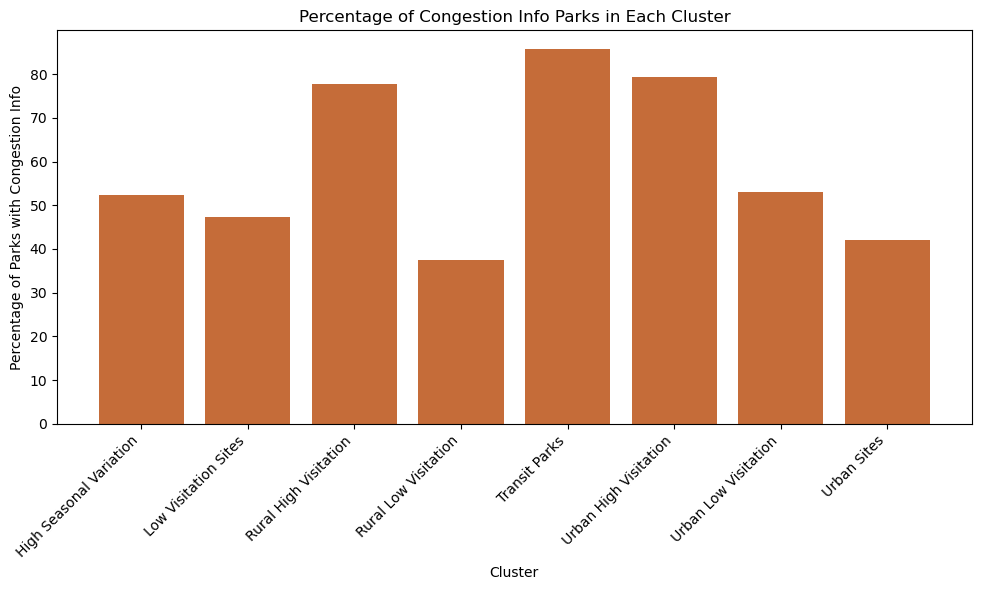

In [15]:
plt.figure(figsize=(10, 6)) 
plt.bar(label_counts['Label'], label_counts['Percent_trail'], color='#C56C39')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Congestion Info')
plt.title('Percentage of Congestion Info Parks in Each Cluster')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

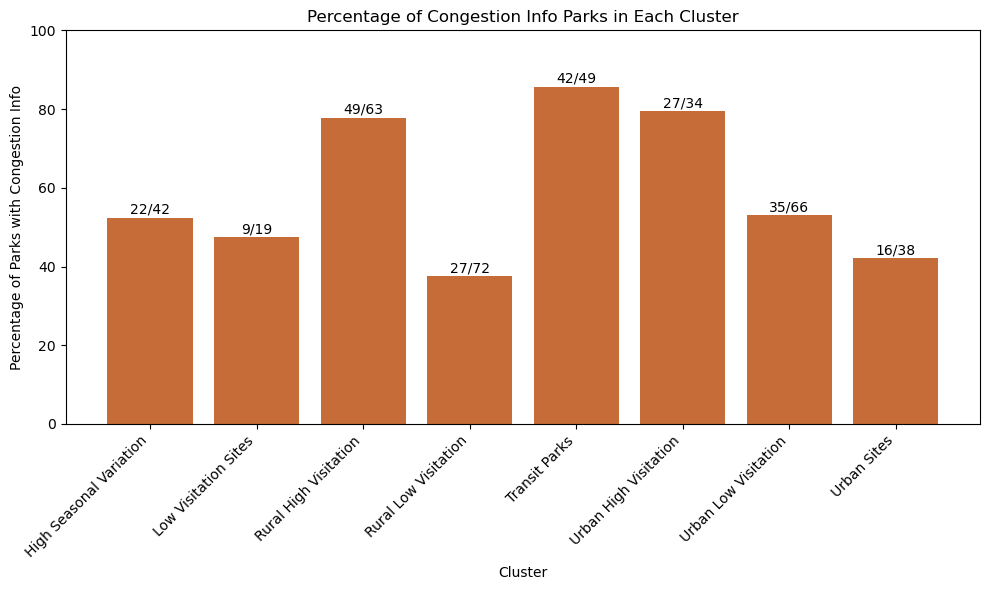

In [16]:
plt.figure(figsize=(10, 6)) 
bars = plt.bar(label_counts['Label'], label_counts['Percent_trail'], color='#C56C39')

for i, bar in enumerate(bars):
    ev_parks = label_counts['trail_Parks'].iloc[i]
    total_parks = label_counts['Total_Parks'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25,
             f"{ev_parks}/{total_parks}",
             ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Congestion Info')
plt.title('Percentage of Congestion Info Parks in Each Cluster')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("CongestionGraph.png")
plt.show()

In [17]:
path = "pyvpages.xlsx"
sites = pd.read_excel(path)
sites.head

<bound method NDFrame.head of        park                                                url
0      abli                 /abli/planyourvisit/lincolnbio.htm
1      abli                      /abli/planyourvisit/hours.htm
2      abli               /abli/planyourvisit/boyhood-home.htm
3      abli                  /abli/planyourvisit/basicinfo.htm
4      abli                 /abli/planyourvisit/directions.htm
...     ...                                                ...
25355  zion       /zion/planyourvisit/laverkin-creek-trail.htm
25356  zion                  /zion/planyourvisit/lightning.htm
25357  zion         /zion/planyourvisit/other-special-uses.htm
25358  zion      /zion/planyourvisit/park-pass-information.htm
25359  zion  /zion/planyourvisit/wildcat-canyon-northgate-p...

[25360 rows x 2 columns]>

In [18]:
website_stems = sites[['park', 'url']]
website_stems.head

<bound method NDFrame.head of        park                                                url
0      abli                 /abli/planyourvisit/lincolnbio.htm
1      abli                      /abli/planyourvisit/hours.htm
2      abli               /abli/planyourvisit/boyhood-home.htm
3      abli                  /abli/planyourvisit/basicinfo.htm
4      abli                 /abli/planyourvisit/directions.htm
...     ...                                                ...
25355  zion       /zion/planyourvisit/laverkin-creek-trail.htm
25356  zion                  /zion/planyourvisit/lightning.htm
25357  zion         /zion/planyourvisit/other-special-uses.htm
25358  zion      /zion/planyourvisit/park-pass-information.htm
25359  zion  /zion/planyourvisit/wildcat-canyon-northgate-p...

[25360 rows x 2 columns]>

In [19]:
def extract_text(url):
    start = url.find('planyourvisit/') + len('planyourvisit/')
    end = url.find('.htm', start)
    if start != -1 and end != -1:
        return url[start:end]
    return None

sites['url_stem'] = sites['url'].apply(extract_text)
sites.head

<bound method NDFrame.head of        park                                                url                               url_stem
0      abli                 /abli/planyourvisit/lincolnbio.htm                             lincolnbio
1      abli                      /abli/planyourvisit/hours.htm                                  hours
2      abli               /abli/planyourvisit/boyhood-home.htm                           boyhood-home
3      abli                  /abli/planyourvisit/basicinfo.htm                              basicinfo
4      abli                 /abli/planyourvisit/directions.htm                             directions
...     ...                                                ...                                    ...
25355  zion       /zion/planyourvisit/laverkin-creek-trail.htm                   laverkin-creek-trail
25356  zion                  /zion/planyourvisit/lightning.htm                              lightning
25357  zion         /zion/planyourvisit/other-specia

In [20]:
# Define parking words
trail_words =  [
       "congest", "peak season", "capacity", "busy season", "high demand", "limited availability", "traffic"]

# Function to count accessibility words in text
def count_trail_words(text):
    word_counts = {word: text.lower().count(word) for word in trail_words}
    return word_counts

# Apply the function to 'url_stem' column and convert to DataFrame
word_counts_df = sites['url_stem'].apply(count_trail_words).apply(pd.Series)
word_counts_df['trail_page'] = word_counts_df.apply(lambda row: 1 if row.any() >= 1 else 0, axis=1)
word_counts_df = word_counts_df[['trail_page']]
# Display the resulting DataFrame
print(word_counts_df.head())
sites = pd.concat([sites, word_counts_df], axis=1)
sites.to_csv("congestionpagelist.csv")
sites.head

   trail_page
0           0
1           0
2           0
3           0
4           0


<bound method NDFrame.head of        park                                                url                               url_stem  trail_page
0      abli                 /abli/planyourvisit/lincolnbio.htm                             lincolnbio           0
1      abli                      /abli/planyourvisit/hours.htm                                  hours           0
2      abli               /abli/planyourvisit/boyhood-home.htm                           boyhood-home           0
3      abli                  /abli/planyourvisit/basicinfo.htm                              basicinfo           0
4      abli                 /abli/planyourvisit/directions.htm                             directions           0
...     ...                                                ...                                    ...         ...
25355  zion       /zion/planyourvisit/laverkin-creek-trail.htm                   laverkin-creek-trail           0
25356  zion                  /zion/planyourvisit/lightning

In [21]:
park_word_counts = sites.groupby('park')['trail_page'].sum().reset_index()
# Display the resulting DataFrame
park_word_counts.rename(columns={'park':"Park Alpha"}, inplace = True)
park_word_counts['Park Alpha'] = park_word_counts['Park Alpha'].str.upper()
pagesbycluster = pd.merge(park_word_counts, clusters, on="Park Alpha", how="left")
print(pagesbycluster)

    Park Alpha  trail_page                                      NPS Full Name Region  FinalCluster                    Label
0         ABLI           0  Abraham Lincoln Birthplace National Historical...    SER           8.0    Rural High Visitation
1         ACAD           0                               Acadia National Park    NER           1.0            Transit Parks
2         ADAM           0                     Adams National Historical Park    NER           1.0            Transit Parks
3         AFAM           0                                                NaN    NaN           NaN                      NaN
4         AFBG           0            African Burial Ground National Monument    NER           2.0              Urban Sites
..         ...         ...                                                ...    ...           ...                      ...
469       YORK           0                                                NaN    NaN           NaN                      NaN
470     

In [22]:
filtered_df = pagesbycluster[pagesbycluster['trail_page'] >= 1]
print(filtered_df)

    Park Alpha  trail_page                                    NPS Full Name Region  FinalCluster                    Label
24        ARCH           2                             Arches National Park    IMR           8.0    Rural High Visitation
41        BISC           2                           Biscayne National Park    SER           5.0    Urban High Visitation
53        BRCA           2                       Bryce Canyon National Park    IMR           1.0            Transit Parks
59        CABR           1                       Cabrillo National Monument    PWR           5.0    Urban High Visitation
81        CAVO           1                Capulin Volcano National Monument    IMR           6.0  High Seasonal Variation
90        CHCU           2           Chaco Culture National Historical Park    IMR           7.0     Rural Low Visitation
110       CUGA           2          Cumberland Gap National Historical Park    SER           5.0    Urban High Visitation
160       FOSM          

In [23]:
ev_parks_counts = filtered_df.groupby('Label').size().reset_index(name='trail_Parks')
label_counts = pd.merge(total_parks_counts, ev_parks_counts, on='Label', how='left')
label_counts['trail_Parks'].fillna(0, inplace=True)
label_counts['Percent_trail'] = round((label_counts['trail_Parks'] / label_counts['Total_Parks']) * 100, 1)
label_counts['trail_Parks'] = label_counts['trail_Parks'].astype(int)
label_counts.head()

,Label,Total_Parks,trail_Parks,Percent_trail
0,High Seasonal Variation,42,2,4.8
1,Low Visitation Sites,19,2,10.5
2,Rural High Visitation,63,4,6.3
3,Rural Low Visitation,72,1,1.4
4,Transit Parks,49,3,6.1


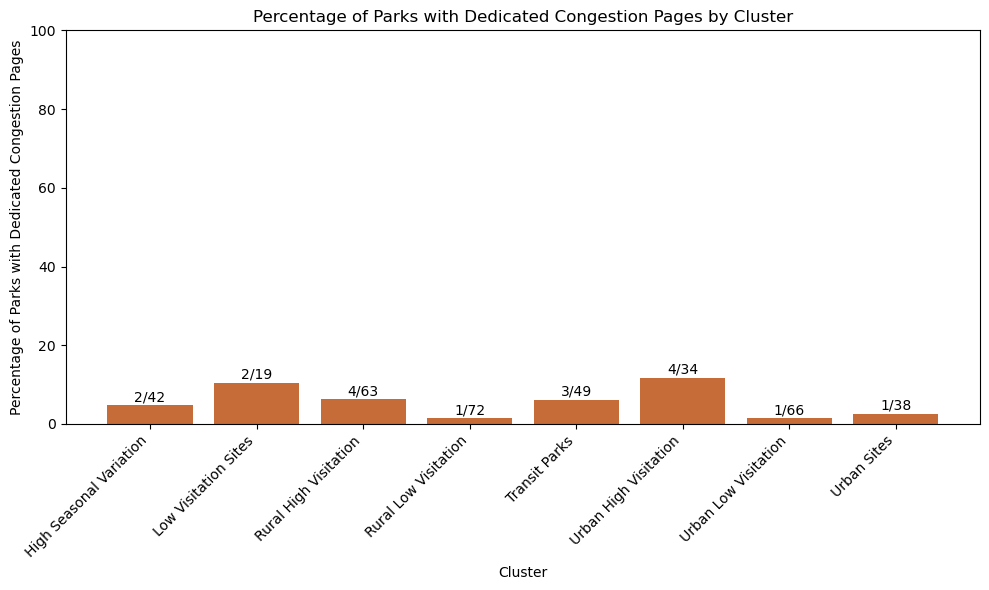

In [24]:
plt.figure(figsize=(10, 6)) 
bars = plt.bar(label_counts['Label'], label_counts['Percent_trail'], color='#C56C39')

for i, bar in enumerate(bars):
    ev_parks = label_counts['trail_Parks'].iloc[i]
    total_parks = label_counts['Total_Parks'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25,
             f"{ev_parks}/{total_parks}",
             ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Dedicated Congestion Pages')
plt.title('Percentage of Parks with Dedicated Congestion Pages by Cluster')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("CongestionPagesUpdated.png")
plt.show()

In [25]:
website_stems2 = park_scrape_dataset2[['park', 'website page', "total"]]
def extract_text(url):
    start = url.find('planyourvisit/') + len('planyourvisit/')
    end = url.find('.htm', start)
    if start != -1 and end != -1:
        return url[start:end]
    return None
website_stems2['url_stem'] = website_stems2['website page'].apply(extract_text)
website_stems2.head()

,park,website page,total,url_stem
0,ABLI,https://home.nps.gov/abli/planyourvisit/direct...,0,directions
1,ABLI,https://home.nps.gov/abli/planyourvisit/direct...,0,directions
2,ABLI,https://home.nps.gov/abli/planyourvisit/direct...,0,directions
3,ABLI,https://home.nps.gov/abli/planyourvisit/direct...,0,directions
4,ABLI,https://home.nps.gov/abli/planyourvisit/direct...,0,directions


In [26]:
targetstems = website_stems2[website_stems2['total'] >= 1]
targetstems.head()

,park,website page,total,url_stem
25,ACAD,https://home.nps.gov/acad/planyourvisit/fees.htm,4,fees
29,ACAD,https://home.nps.gov/acad/planyourvisit/specia...,1,special-use-permits
30,ACAD,https://home.nps.gov/acad/planyourvisit/vehicl...,2,vehicle_reservations
36,ACAD,https://home.nps.gov/acad/planyourvisit/island...,2,island-explorer
38,ACAD,https://home.nps.gov/acad/planyourvisit/oversi...,3,oversized-vehicles


In [27]:
top25=targetstems['url_stem'].value_counts().head(25)
print(top25)

directions                736
fees                       69
conditions                 63
safety                     63
basicinfo                  51
maps                       34
index                      32
hours                      27
permitsandreservations     26
gettingaround              25
pets                       22
things2do                  18
trafficandtraveltips       18
calendar                   16
camping                    16
bicycling                  15
weather                    13
accessibility              13
biking                     11
placestogo                 10
park-brochure               9
parking                     9
permits                     9
hiking                      9
bicyclinginformation        9
Name: url_stem, dtype: int64
